C:\Users\satis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\satis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.7211351645493507


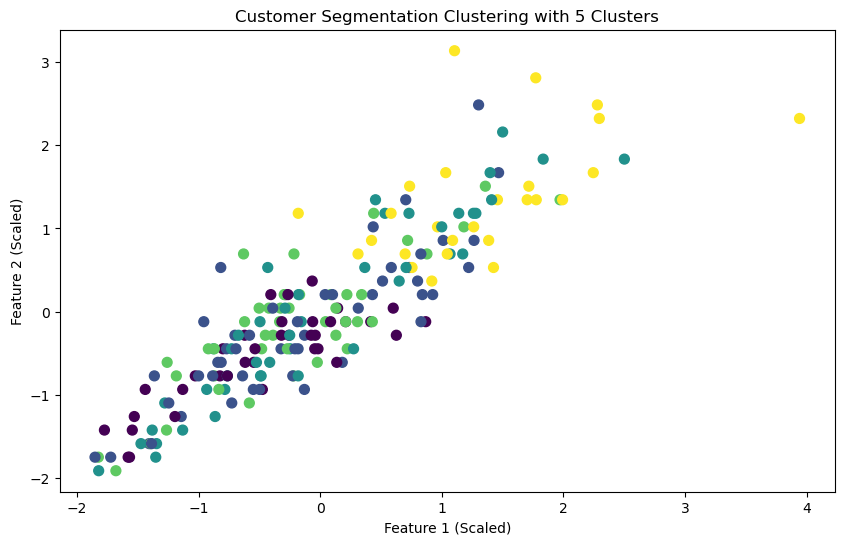

In [3]:
#Clustering Segmentation
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd

# Merge datasets (Customers and Transactions)
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

# Feature Engineering: Aggregate transaction information (TotalValue and Quantity) and merge with customer profile information
customer_profile = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Sum of transaction values
    'Quantity': 'sum',         # Sum of product quantities bought
}).reset_index()

# Merge the aggregated transaction information back with the customer profile data
customer_profile = pd.merge(customer_profile, customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Encode the categorical variable 'Region' (if you have more profile columns, include them here)
customer_profile = pd.get_dummies(customer_profile, columns=['Region'])

# Normalize the data for clustering (excluding the 'CustomerID' column)
scaler = StandardScaler()
features_for_clustering = customer_profile.drop('CustomerID', axis=1)
customer_profile_scaled = scaler.fit_transform(features_for_clustering)

# Choose the number of clusters (between 2 and 10)
n_clusters = 5  # You can change this based on your analysis

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(customer_profile_scaled)

# Calculate Davies-Bouldin Index (DB Index) to evaluate clustering performance
db_index = davies_bouldin_score(customer_profile_scaled, customer_profile['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Visualize the clusters (using first two features for simplicity in 2D visualization)
plt.figure(figsize=(10,6))
plt.scatter(customer_profile_scaled[:, 0], customer_profile_scaled[:, 1], 
            c=customer_profile['Cluster'], cmap='viridis', s=50)
plt.title(f'Customer Segmentation Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

# Save the clustering results with customer IDs and assigned clusters
customer_profile[['CustomerID', 'Cluster']].to_csv('FirstName_LastName_Clustering.csv', index=False)
